In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import string 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Reading and inspection

In [2]:
# Reading the Movie_Review_dataset
movie_df = pd.read_csv("Movie_Review_Dataset.csv")
movie_df.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you ' ve got mail works alot better than it de...,pos
3,""" jaws "" is a rare film that grabs your attent...",pos
4,moviemaking is a lot like being the general ma...,pos


In [3]:
#checking the null values
movie_df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

As you can see there is no null values in both the columns

In [4]:
# inspecting the no. of rows and columns
print("Rows: ",movie_df.shape[0])
print("Columns: ",movie_df.shape[1])

Rows:  2000
Columns:  2


In [5]:
# counting pos and neg instances
pos_neg = movie_df['Sentiment'].value_counts()
pos_neg

neg    1000
pos    1000
Name: Sentiment, dtype: int64

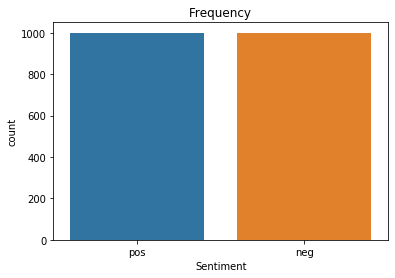

In [6]:
# countplot

sns.countplot(x = 'Sentiment', data = movie_df)
plt.title("Frequency")
plt.show()

The frequency of both **'pos'** and **'neg'** is same i.e. 1000

In [7]:
# Summary of the datasset

movie_df.describe()

,Review,Sentiment
count,2000,2000
unique,2000,2
top,i won  t even pretend that i have seen the ot...,neg
freq,1,1000


## Data Pre-processing

In [8]:
# Labelling pos as '0' and neg as '1' for further analysis

movie_df['label']=movie_df['Sentiment'].map({'neg':1,'pos':0}).astype(int)
movie_df.head()

,Review,Sentiment,label
0,films adapted from comic books have had plenty...,pos,0
1,every now and then a movie comes along from a ...,pos,0
2,you ' ve got mail works alot better than it de...,pos,0
3,""" jaws "" is a rare film that grabs your attent...",pos,0
4,moviemaking is a lot like being the general ma...,pos,0


In [9]:
# Defining a function that will remove non-alphabetic, whitespaces

def clean(text):    
    data=re.sub('[^a-zA-Z]',' ',text) 
    data=re.sub('\b[a-zA-Z]\b','',data)
    data=re.sub('\W',' ',data)
    data=re.sub('\t',' ',data)
    data=data.lower()
    data=data.lstrip()
    data=data.rstrip()
    return data

In [10]:
#Applying above created function on the dataset

cleaned_df = movie_df['Review'].apply(clean)
cleaned_df[1]

'every now and then a movie comes along from a suspect studio   with every indication that it will be a stinker   and to everybody   s surprise   perhaps even the studio   the film becomes a critical darling   mtv films    election   a high school comedy starring matthew broderick and reese witherspoon   is a current example   did anybody know this film existed a week before it opened   the plot is deceptively simple   george washington carver high school is having student elections   tracy flick   reese witherspoon   is an over   achiever with her hand raised at nearly every question   way   way   high   mr     m     matthew broderick     sick of the megalomaniac student   encourages paul   a popular   but   slow jock to run   and paul   s nihilistic sister jumps in the race as well   for personal reasons   the dark side of such sleeper success is that   because expectations were so low going in   the fact that this was quality stuff made the reviews even more enthusiastic than they h

In [11]:
# tokenization

tokenized_df = cleaned_df.apply(lambda row:nltk.word_tokenize(row))
tokenized_df

0       [films, adapted, from, comic, books, have, had...
1       [every, now, and, then, a, movie, comes, along...
2       [you, ve, got, mail, works, alot, better, than...
3       [jaws, is, a, rare, film, that, grabs, your, a...
4       [moviemaking, is, a, lot, like, being, the, ge...
                              ...                        
1995    [if, anything, stigmata, should, be, taken, as...
1996    [john, boorman, s, zardoz, is, a, goofy, cinem...
1997    [the, kids, in, the, hall, are, an, acquired, ...
1998    [there, was, a, time, when, john, carpenter, w...
1999    [two, party, guys, bob, their, heads, to, hadd...
Name: Review, Length: 2000, dtype: object

In [12]:
# Creating a function that will remove stopwords from the text

def remove_stopwords(text):
    stop_words=set(stopwords.words('english'))
    cleaned_text=[word for word in text if word not in stop_words]
    return cleaned_text

In [13]:
# applying the above created function

without_stopwords_df = tokenized_df.apply(remove_stopwords)
without_stopwords_df

0       [films, adapted, comic, books, plenty, success...
1       [every, movie, comes, along, suspect, studio, ...
2       [got, mail, works, alot, better, deserves, ord...
3       [jaws, rare, film, grabs, attention, shows, si...
4       [moviemaking, lot, like, general, manager, nfl...
                              ...                        
1995    [anything, stigmata, taken, warning, releasing...
1996    [john, boorman, zardoz, goofy, cinematic, deba...
1997    [kids, hall, acquired, taste, took, least, sea...
1998    [time, john, carpenter, great, horror, directo...
1999    [two, party, guys, bob, heads, haddaway, dance...
Name: Review, Length: 2000, dtype: object

In [14]:
# Lemmatization

lemmatization=WordNetLemmatizer()
def lemmatize(text):
    lemma =[lemmatization.lemmatize(word,pos='v')for word in text]
    return lemma

In [15]:
lemmatized_df = without_stopwords_df.apply(lemmatize)
lemmatized_df

0       [film, adapt, comic, book, plenty, success, wh...
1       [every, movie, come, along, suspect, studio, e...
2       [get, mail, work, alot, better, deserve, order...
3       [jaw, rare, film, grab, attention, show, singl...
4       [moviemaking, lot, like, general, manager, nfl...
                              ...                        
1995    [anything, stigmata, take, warn, release, simi...
1996    [john, boorman, zardoz, goofy, cinematic, deba...
1997    [kid, hall, acquire, taste, take, least, seaso...
1998    [time, john, carpenter, great, horror, directo...
1999    [two, party, guy, bob, head, haddaway, dance, ...
Name: Review, Length: 2000, dtype: object

In [16]:
# Creating the corpus

corpus = []
for i in lemmatized_df:
    t =' '.join([row for row in i])
    corpus.append(t)

In [17]:
len(corpus)

2000

## TF-IDF Vectorization

TF-IDF stands for **term frequency-inverse document frequency**.Now we are going to create tf-idf model using TfidfVectorizer().

In [18]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(corpus)
tfidf_model = tfidf_model.toarray()

In [19]:
print(tfidf_model)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Multinomial Naive baye's classification model

In [20]:
X = tfidf_model

In [21]:
y = movie_df['label']

In [22]:
# Splitting the dataset into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [23]:
# Creating the multinomial naive bayes' model and fitting the train and test data

clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
pred=clf.predict(X_test)

In [25]:
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [26]:
y_test

1312    1
479     0
1404    1
664     0
1133    1
       ..
1891    1
217     0
286     0
1380    1
130     0
Name: label, Length: 400, dtype: int32

In [27]:
#computing the accuracy of the model

acc=accuracy_score(y_test,pred)

In [28]:
acc

0.8225

The accuracy of the multinomial naive bayes' classification model is 82.25%.

## K-fold cross validation

In [29]:
# prepare the cross-validation procedure

cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [30]:
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [31]:
print(scores)

[0.815  0.8225 0.8175 0.7725 0.8   ]


In [32]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.805 (0.018)


### Classification report

In [33]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       201
           1       0.80      0.86      0.83       199

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



### Confusion Matrix

In [34]:
confusion = confusion_matrix(y_test,pred)
print(confusion)

[[158  43]
 [ 28 171]]


Text(0.5, 33.0, 'predicted label')

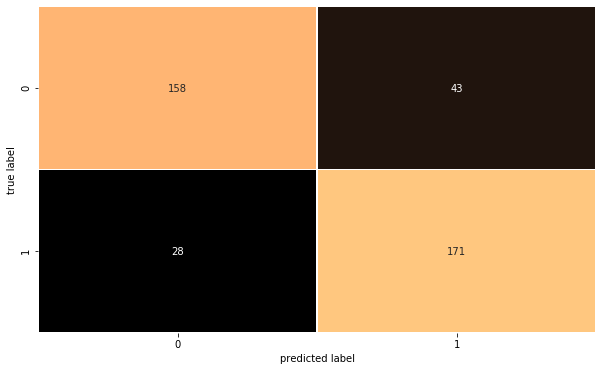

In [35]:
# visulaizing the confusion matrix

fig,ax=plt.subplots(figsize=(10,6))
matrix=confusion_matrix(y_test,pred)
sns.heatmap(matrix,annot=True,fmt='d',linewidths=.5,cmap='copper',cbar=False,ax=ax)
plt.ylabel('true label')
plt.xlabel('predicted label') 

In [36]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [37]:
# computing the sensitivity and specificity

sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)

sensitivity 0.8592964824120602
specificity 0.7860696517412935


In [38]:
# predict probabilities
y_pred_proba = clf.predict_proba(X_test)

In [39]:
y_pred_proba

array([[0.36863825, 0.63136175],
       [0.56550637, 0.43449363],
       [0.30865114, 0.69134886],
       [0.46159086, 0.53840914],
       [0.23102338, 0.76897662],
       [0.55620684, 0.44379316],
       [0.5568011 , 0.4431989 ],
       [0.28253409, 0.71746591],
       [0.69263429, 0.30736571],
       [0.3136183 , 0.6863817 ],
       [0.22601581, 0.77398419],
       [0.5023203 , 0.4976797 ],
       [0.5224554 , 0.4775446 ],
       [0.39977573, 0.60022427],
       [0.33947332, 0.66052668],
       [0.33298103, 0.66701897],
       [0.4192951 , 0.5807049 ],
       [0.69919074, 0.30080926],
       [0.23583814, 0.76416186],
       [0.5249363 , 0.4750637 ],
       [0.32986391, 0.67013609],
       [0.3523848 , 0.6476152 ],
       [0.53837315, 0.46162685],
       [0.31340497, 0.68659503],
       [0.46312226, 0.53687774],
       [0.43596361, 0.56403639],
       [0.34688685, 0.65311315],
       [0.83673039, 0.16326961],
       [0.56662528, 0.43337472],
       [0.46375587, 0.53624413],
       [0.

## ROC curve

In [40]:
# creating an ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [41]:
#area under the curve
print(roc_auc)

0.9087977199429986


In [42]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.892709,0.000000,0.000000
1,0.892709,0.005025,0.000000
2,0.726960,0.206030,0.000000
3,0.726154,0.206030,0.004975
4,0.717687,0.221106,0.004975
...,...,...,...
101,0.388501,0.989950,0.552239
102,0.388114,0.994975,0.552239
103,0.373378,0.994975,0.601990
104,0.370401,1.000000,0.601990


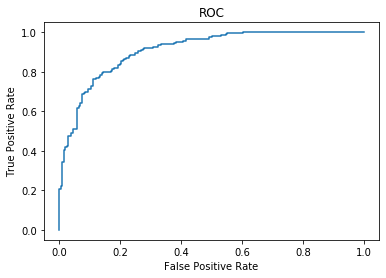

In [43]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)